In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

import xgboost as xgb

In [49]:
corneal = pd.read_csv('C:/Users/Таня/Desktop/просто/наше/Хакатон_сбер/corneal.csv')
corneal

,SMILES,logPerm
0,CC1CC2C3CCC(C3(CC(C2(C4(C1=CC(=O)C=C4)C)F)O)C)...,5.14
1,CC(C1=CC(=C(C=C1)C2=CC=CC=C2)F)C(=O)O,5.35
2,CC(C1=CC(=C(C=C1)C2=CC=CC=C2)F)C(=O)N,5.39
3,C(C(CO)O)O,3.81
4,CC12CCC(=O)C=C1CCC3C2C(CC4(C3CCC4(C(=O)CO)O)C)O,4.44
...,...,...
115,C1CN2C(=CC=C2C(=O)C3=CC=CC=C3)C1C(=O)O,1.25
116,CC1CN(CCC1(C2=CC=CC=C2)C(=O)O)C3CCC(CC3)(C#N)C...,1.41
117,COC1=CC2=C(C=CN=C2C=C1)C(C3CC4CCN3CC4C=C)O,2.16
118,C1CN=C(N1)NC2=C(C=CC3=NSN=C32)Cl,3.85


In [69]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors



# Рассчитываем logP и сохраняем в новый столбец
corneal['logP'] = corneal['SMILES'].apply(lambda x: Descriptors.MolLogP(Chem.MolFromSmiles(x)) if Chem.MolFromSmiles(x) is not None else None)

# Выводим DataFrame с результатами
print(corneal)



                                                SMILES  logPerm  logP
0    CC1CC2C3CCC(C3(CC(C2(C4(C1=CC(=O)C=C4)C)F)O)C)...     5.14  2.92
1                CC(C1=CC(=C(C=C1)C2=CC=CC=C2)F)C(=O)O     5.35  3.68
2                CC(C1=CC(=C(C=C1)C2=CC=CC=C2)F)C(=O)N     5.39  3.08
3                                           C(C(CO)O)O     3.81 -1.67
4      CC12CCC(=O)C=C1CCC3C2C(CC4(C3CCC4(C(=O)CO)O)C)O     4.44  1.78
..                                                 ...      ...   ...
115             C1CN2C(=CC=C2C(=O)C3=CC=CC=C3)C1C(=O)O     1.25  2.29
116  CC1CN(CCC1(C2=CC=CC=C2)C(=O)O)C3CCC(CC3)(C#N)C...     1.41  4.89
117         COC1=CC2=C(C=CN=C2C=C1)C(C3CC4CCN3CC4C=C)O     2.16  3.17
118                   C1CN=C(N1)NC2=C(C=CC3=NSN=C32)Cl     3.85  1.72
119  CC(C1=NC=NC=C1F)C(CN2C=NC=N2)(C3=C(C=C(C=C3)F)F)O     3.46  2.18

[120 rows x 3 columns]


In [50]:
import pandas as pd
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors

# Функция для получения молекулярных дескрипторов
def get_molecular_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return [None] * len(descriptor_names)  # Возвращаем None для всех дескрипторов, если SMILES некорректен
    descriptors = descriptor_calculator.CalcDescriptors(mol)
    return descriptors

# Предполагаем, что ваш DataFrame уже загружен и называется melanin
# Получаем список доступных дескрипторов
descriptor_names = [desc[0] for desc in Chem.Descriptors._descList]  # Извлекаем только имена дескрипторов
descriptor_calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)

# Применяем функцию к столбцу SMILES и создаем новый DataFrame с дескрипторами
descriptors_df = corneal['SMILES'].apply(get_molecular_descriptors).apply(pd.Series)

# Переименовываем столбцы дескрипторов
descriptors_df.columns = descriptor_names

# Объединяем оригинальный DataFrame с новыми дескрипторами
result_df = pd.concat([corneal, descriptors_df], axis=1)

# Сохраняем результат в новый CSV файл
result_df.to_csv('corneal_with_descriptors.csv', index=False)

print("Дескрипторы успешно извлечены и сохранены в 'corneal_with_descriptors.csv'.")

Дескрипторы успешно извлечены и сохранены в 'corneal_with_descriptors.csv'.


In [51]:
corneal_with_descriptors = pd.read_csv('C:/Users/Таня/Desktop/просто/наше/ProstoSPB-Hackathon/notebooks/corneal_with_descriptors.csv')
corneal_with_descriptors

,SMILES,logPerm,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CC1CC2C3CCC(C3(CC(C2(C4(C1=CC(=O)C=C4)C)F)O)C)...,5.14,16.87,16.87,0.00,-1.92,0.74,54.04,376.47,347.24,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,CC(C1=CC(=C(C=C1)C2=CC=CC=C2)F)C(=O)O,5.35,13.97,13.97,0.40,-0.96,0.89,12.11,244.26,231.16,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,CC(C1=CC(=C(C=C1)C2=CC=CC=C2)F)C(=O)N,5.39,14.01,14.01,0.34,-0.48,0.88,12.11,243.28,229.17,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,C(C(CO)O)O,3.81,8.17,8.17,0.36,-0.95,0.38,10.00,92.09,84.03,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,CC12CCC(=O)C=C1CCC3C2C(CC4(C3CCC4(C(=O)CO)O)C)O,4.44,12.36,12.36,0.07,-1.54,0.70,50.50,362.47,332.23,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,C1CN2C(=CC=C2C(=O)C3=CC=CC=C3)C1C(=O)O,1.25,12.38,12.38,0.06,-0.82,0.86,17.16,255.27,242.17,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
116,CC1CN(CCC1(C2=CC=CC=C2)C(=O)O)C3CCC(CC3)(C#N)C...,1.41,13.33,13.33,0.01,-0.85,0.76,31.65,420.53,391.30,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
117,COC1=CC2=C(C=CN=C2C=C1)C(C3CC4CCN3CC4C=C)O,2.16,11.15,11.15,0.18,-0.50,0.88,30.25,324.42,300.23,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
118,C1CN=C(N1)NC2=C(C=CC3=NSN=C32)Cl,3.85,6.13,6.13,0.62,0.62,0.81,14.94,253.72,245.65,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [52]:
corneal_with_descriptors = corneal_with_descriptors.drop('SMILES', axis=1)
corneal_with_descriptors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Columns: 218 entries, logPerm to fr_urea
dtypes: float64(218)
memory usage: 204.5 KB


In [53]:


# Вычисляем третий квартиль для каждого столбца
q3 = corneal_with_descriptors.quantile(0.75)

# Отбираем только те столбцы, где Q3 > 0
filtered_corneal_with_descriptors = corneal_with_descriptors.loc[:, q3 > 0]

filtered_corneal_with_descriptors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Columns: 126 entries, logPerm to fr_sulfonamd
dtypes: float64(126)
memory usage: 118.3 KB


In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors

# Задаем SMILES
smiles = 'CC(O)C'
mol = Chem.MolFromSmiles(smiles)

# Извлекаем дескрипторы
mol_weight = Descriptors.MolWt(mol)
logP = Descriptors.MolLogP(mol)
num_atoms = mol.GetNumAtoms()
num_bonds = mol.GetNumBonds()

print(f'Molecular Weight: {mol_weight}')
print(f'LogP: {logP}')
print(f'Number of Atoms: {num_atoms}')
print(f'Number of Bonds: {num_bonds}')

In [54]:
columns = filtered_corneal_with_descriptors.columns[1:]
columns

Index(['MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'qed',
       'SPS', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons',
       'MaxPartialCharge',
       ...
       'fr_C_O_noCOO', 'fr_NH0', 'fr_NH1', 'fr_NH2', 'fr_aniline',
       'fr_benzene', 'fr_bicyclic', 'fr_ether', 'fr_halogen', 'fr_sulfonamd'],
      dtype='object', length=125)

              feature   VIF
16       BCUT2D_MWLOW  0.00
18      BCUT2D_LOGPHI  0.01
17       BCUT2D_CHGHI  0.01
21             AvgIpc  0.03
13   FpDensityMorgan2  0.03
..                ...   ...
111          fr_Al_OH 47.74
85        VSA_EState3 49.89
112   fr_Al_OH_noTert 53.27
87        VSA_EState5 65.31
89        VSA_EState7 69.94

[124 rows x 2 columns]


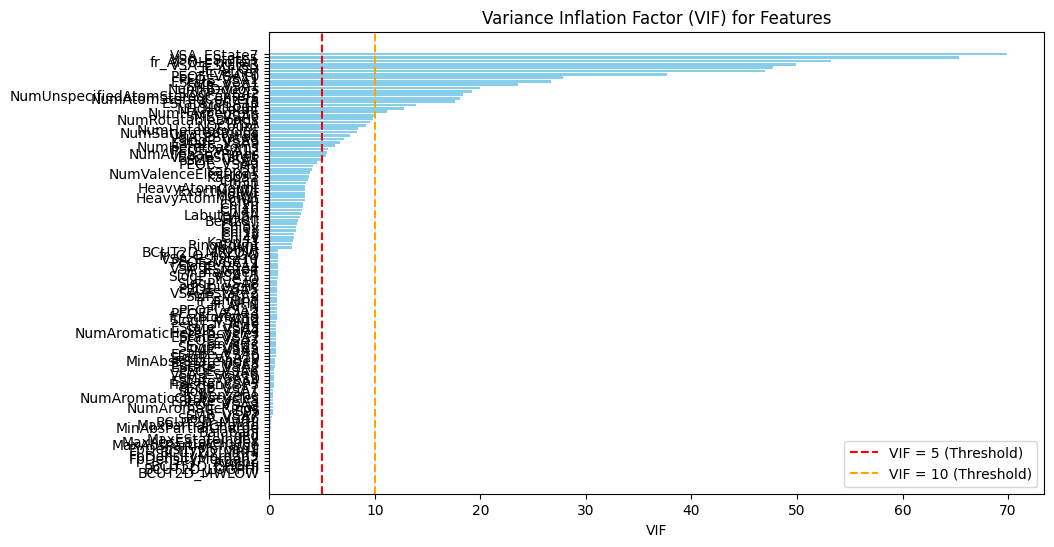

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["feature"] = filtered_corneal_with_descriptors[columns].columns
vif["VIF"] = [variance_inflation_factor(filtered_corneal_with_descriptors[columns].values, i) for i in range(filtered_corneal_with_descriptors[columns].shape[1])]

vif = vif.sort_values(by="VIF", ascending=True)

# Удаление строк с отсутствующими значениями в столбце VIF
vif = vif.dropna(subset=["VIF"])

print(vif)

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.barh(vif["feature"], vif["VIF"], color='skyblue')
plt.xlabel('VIF')
plt.title('Variance Inflation Factor (VIF) for Features')
plt.axvline(x=5, color='red', linestyle='--', label='VIF = 5 (Threshold)')
plt.axvline(x=10, color='orange', linestyle='--', label='VIF = 10 (Threshold)')
plt.legend()
plt.show()


In [56]:
# Удаление строк, где VIF больше 5
vif = vif[vif["VIF"] <= 5]
vif

,feature,VIF
16,BCUT2D_MWLOW,0.00
18,BCUT2D_LOGPHI,0.01
17,BCUT2D_CHGHI,0.01
21,AvgIpc,0.03
13,FpDensityMorgan2,0.03
...,...,...
38,Kappa2,3.77
8,NumValenceElectrons,3.87
37,Kappa1,4.07
107,Phi,4.10


In [57]:
# Извлечение названий столбцов из столбца 'feature' в vif
selected_columns = vif['feature'].tolist()

# Фильтрация corneal_with_descriptors по выбранным столбцам
filtered_data = filtered_corneal_with_descriptors[selected_columns]

# Добавление столбца logPerm
filtered_data['logPerm'] = filtered_corneal_with_descriptors['logPerm']

filtered_corneal_with_descriptors = filtered_data
filtered_corneal_with_descriptors

,BCUT2D_MWLOW,BCUT2D_LOGPHI,BCUT2D_CHGHI,AvgIpc,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MRHI,FpDensityMorgan1,MaxAbsPartialCharge,MaxAbsEStateIndex,...,ExactMolWt,HeavyAtomCount,Chi1,Chi3n,Kappa2,NumValenceElectrons,Kappa1,Phi,PEOE_VSA9,logPerm
0,9.43,2.70,2.74,2.85,1.96,2.59,6.01,1.30,0.39,16.87,...,376.20,27.00,12.42,8.70,5.38,148.00,19.01,3.79,6.10,5.14
1,9.97,2.26,2.15,2.38,1.83,2.39,5.76,1.17,0.48,13.97,...,244.09,18.00,8.59,2.95,5.00,92.00,12.30,3.42,5.92,5.35
2,9.96,2.25,2.14,2.38,1.83,2.39,5.81,1.17,0.37,14.01,...,243.11,18.00,8.59,3.00,5.00,92.00,12.30,3.42,5.92,5.39
3,10.42,1.71,1.93,1.65,1.50,1.50,4.43,1.17,0.39,8.17,...,92.05,6.00,2.81,0.42,3.08,38.00,5.88,3.02,13.21,3.81
4,9.45,2.67,2.68,2.86,1.96,2.65,5.91,1.23,0.39,12.36,...,362.21,26.00,12.17,8.65,5.73,144.00,18.33,4.04,6.10,4.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,10.06,2.31,2.31,2.99,1.84,2.53,6.08,1.11,0.48,12.38,...,255.09,19.00,9.18,3.58,4.39,96.00,11.71,2.71,11.61,1.25
116,9.65,2.44,2.50,2.80,1.71,2.26,5.82,1.06,0.48,13.33,...,420.22,31.00,14.91,7.75,8.43,162.00,21.52,5.85,16.90,1.41
117,9.73,2.42,2.42,2.66,2.29,3.00,5.83,1.42,0.50,11.15,...,324.18,24.00,11.71,5.82,6.19,126.00,15.61,4.02,18.73,2.16
118,10.24,2.29,2.13,2.92,2.31,3.12,7.00,1.38,0.35,6.13,...,253.02,16.00,7.84,2.29,3.88,82.00,9.80,2.37,28.98,3.85


Mean Squared Error: 1.7395
R^2 Score: 0.3091
[3.23127568e-03 1.22317317e-03 1.06738817e-03 8.16729956e-03
 4.36599341e-03 2.09220675e-02 9.00764913e-03 4.09513032e-02
 7.21390630e-03 2.67984738e-03 2.08838411e-03 2.40415856e-02
 8.60878874e-03 6.50686276e-02 3.08843178e-02 3.90958326e-02
 2.18125490e-02 1.55569692e-02 8.63159811e-03 2.66249244e-04
 4.86660921e-03 1.02754172e-02 0.00000000e+00 0.00000000e+00
 1.70589576e-02 5.02810895e-02 4.94552190e-03 4.18834085e-02
 2.28445067e-03 8.93715565e-03 5.78287410e-02 1.39373169e-01
 6.71064550e-03 1.90591359e-02 3.04112579e-03 4.62178684e-03
 2.18191916e-02 5.77873988e-03 0.00000000e+00 4.99473925e-03
 1.54370045e-02 1.41266417e-04 1.04264495e-02 1.87574567e-03
 8.18213314e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.44634116e-03 2.03093478e-03 0.00000000e+00 1.05242712e-03
 9.34673564e-04 1.06365991e-02 0.00000000e+00 3.13601152e-03
 3.98370662e-03 2.10484408e-04 1.39820953e-04 8.62743353e-04
 8.60555114e-03 4.20689846e-02 1.9768221

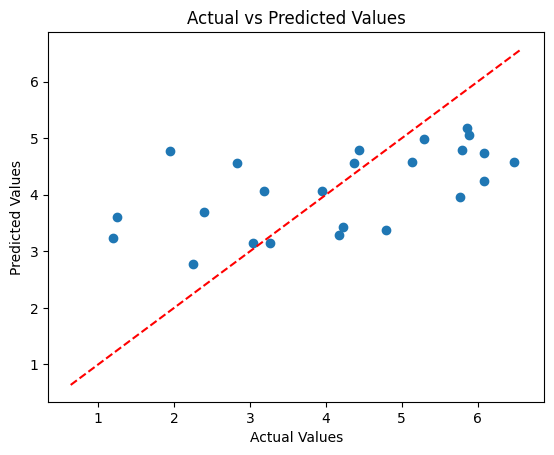

In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Преобразование в DataFrame для удобства
X = filtered_corneal_with_descriptors.drop(['logPerm'], axis=1)
y = filtered_corneal_with_descriptors['logPerm']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Удаление строк с NaN или inf
X_train = X_train.replace([np.inf, -np.inf], np.nan).dropna()
y_train = y_train[X_train.index]  # Обновляем y_train, чтобы он соответствовал X_train

X_test = X_test.replace([np.inf, -np.inf], np.nan).dropna()
y_test = y_test[X_test.index]  # Обновляем y_test, чтобы он соответствовал X_test

# Создание и обучение модели случайного леса с заданными параметрами
model = RandomForestRegressor(
    n_estimators=409,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=8,
    max_features=None,
    random_state=42
)
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка производительности модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')

# Важность признаков
importance = model.feature_importances_
print(importance)

# Визуализация предсказаний
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Линия y=x
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [59]:
filtered_corneal_with_descriptors

,BCUT2D_MWLOW,BCUT2D_LOGPHI,BCUT2D_CHGHI,AvgIpc,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MRHI,FpDensityMorgan1,MaxAbsPartialCharge,MaxAbsEStateIndex,...,ExactMolWt,HeavyAtomCount,Chi1,Chi3n,Kappa2,NumValenceElectrons,Kappa1,Phi,PEOE_VSA9,logPerm
0,9.43,2.70,2.74,2.85,1.96,2.59,6.01,1.30,0.39,16.87,...,376.20,27.00,12.42,8.70,5.38,148.00,19.01,3.79,6.10,5.14
1,9.97,2.26,2.15,2.38,1.83,2.39,5.76,1.17,0.48,13.97,...,244.09,18.00,8.59,2.95,5.00,92.00,12.30,3.42,5.92,5.35
2,9.96,2.25,2.14,2.38,1.83,2.39,5.81,1.17,0.37,14.01,...,243.11,18.00,8.59,3.00,5.00,92.00,12.30,3.42,5.92,5.39
3,10.42,1.71,1.93,1.65,1.50,1.50,4.43,1.17,0.39,8.17,...,92.05,6.00,2.81,0.42,3.08,38.00,5.88,3.02,13.21,3.81
4,9.45,2.67,2.68,2.86,1.96,2.65,5.91,1.23,0.39,12.36,...,362.21,26.00,12.17,8.65,5.73,144.00,18.33,4.04,6.10,4.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,10.06,2.31,2.31,2.99,1.84,2.53,6.08,1.11,0.48,12.38,...,255.09,19.00,9.18,3.58,4.39,96.00,11.71,2.71,11.61,1.25
116,9.65,2.44,2.50,2.80,1.71,2.26,5.82,1.06,0.48,13.33,...,420.22,31.00,14.91,7.75,8.43,162.00,21.52,5.85,16.90,1.41
117,9.73,2.42,2.42,2.66,2.29,3.00,5.83,1.42,0.50,11.15,...,324.18,24.00,11.71,5.82,6.19,126.00,15.61,4.02,18.73,2.16
118,10.24,2.29,2.13,2.92,2.31,3.12,7.00,1.38,0.35,6.13,...,253.02,16.00,7.84,2.29,3.88,82.00,9.80,2.37,28.98,3.85


In [66]:
# Задайте порог важности
threshold = 0.01  # Например, 0.01

# Получите индексы признаков, которые превышают порог
important_indices = np.where(importance > threshold)[0]

# Предположим, что у вас есть DataFrame с признаками
# Например, создадим DataFrame с именами признаков
feature_names = filtered_corneal_with_descriptors.drop(['logPerm'], axis=1).columns

# Создайте новый DataFrame с важными признаками
filtered_corneal_with_descriptors_important = filtered_corneal_with_descriptors.iloc[:, important_indices]

# Добавьте столбец logPerm в новый DataFrame
filtered_corneal_with_descriptors_important['logPerm'] = filtered_corneal_with_descriptors['logPerm'].values

# Если нужно, можно также сохранить имена признаков
important_feature_names = feature_names[important_indices]

print("Имена важных признаков:", important_feature_names)
print("Новый DataFrame с важными признаками и logPerm:")
print(filtered_corneal_with_descriptors_important)

Имена важных признаков: Index(['FpDensityMorgan3', 'FpDensityMorgan1', 'qed', 'MinAbsPartialCharge',
       'MaxPartialCharge', 'BCUT2D_MWHI', 'SlogP_VSA6', 'SMR_VSA7',
       'EState_VSA3', 'SlogP_VSA1', 'PEOE_VSA7', 'EState_VSA4', 'PEOE_VSA6',
       'EState_VSA2', 'MinAbsEStateIndex', 'SMR_VSA3', 'EState_VSA7',
       'SMR_VSA4', 'VSA_EState2', 'SlogP_VSA4', 'BCUT2D_MRLOW', 'Kappa3',
       'PEOE_VSA9'],
      dtype='object')
Новый DataFrame с важными признаками и logPerm:
     FpDensityMorgan3  FpDensityMorgan1  qed  MinAbsPartialCharge  \
0                2.59              1.30 0.74                 0.18   
1                2.39              1.17 0.89                 0.31   
2                2.39              1.17 0.88                 0.22   
3                1.50              1.17 0.38                 0.10   
4                2.65              1.23 0.70                 0.19   
..                ...               ...  ...                  ...   
115              2.53              1

Mean Squared Error: 1.7694
R^2 Score: 0.2972
[0.02588972 0.05539646 0.01847152 0.10250222 0.03877191 0.02264805
 0.02604452 0.02586824 0.0178808  0.04011439 0.04787394 0.04993597
 0.06854176 0.14154017 0.02930637 0.03259071 0.02388633 0.01645524
 0.02125721 0.05099567 0.06643603 0.03586383 0.04172894]


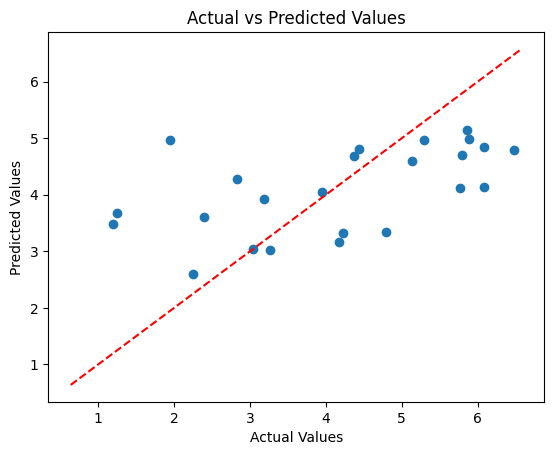

In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Преобразование в DataFrame для удобства
X = filtered_corneal_with_descriptors_important.drop(['logPerm'], axis=1)
y = filtered_corneal_with_descriptors_important['logPerm']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Удаление строк с NaN или inf
X_train = X_train.replace([np.inf, -np.inf], np.nan).dropna()
y_train = y_train[X_train.index]  # Обновляем y_train, чтобы он соответствовал X_train

X_test = X_test.replace([np.inf, -np.inf], np.nan).dropna()
y_test = y_test[X_test.index]  # Обновляем y_test, чтобы он соответствовал X_test

# Создание и обучение модели случайного леса с заданными параметрами
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=8,
    max_features=None,
    random_state=42
)
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка производительности модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')

# Важность признаков
importance = model.feature_importances_
print(importance)

# Визуализация предсказаний
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Линия y=x
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

Mean Squared Error: 1.6708
R^2 Score: 0.3363
[0.00681503 0.00368472 0.00399421 0.00454009 0.00978441 0.01510719
 0.030735   0.05852374 0.00972855 0.00250486 0.00828973 0.0210707
 0.01245856 0.07664519 0.0353966  0.01988408 0.01299782 0.01841445
 0.01114015 0.00090456 0.01503403 0.01022162 0.00144813 0.00244375
 0.01432062 0.03117696 0.00381842 0.03844634 0.0119662  0.01261889
 0.05700063 0.07843924 0.00516231 0.0172067  0.00578887 0.00541941
 0.02172681 0.01065162 0.00225523 0.00297457 0.01736091 0.00041432
 0.01049693 0.00549719 0.01087849 0.00229113 0.00030362 0.00052415
 0.00441994 0.00117292 0.00231736 0.00412679 0.00181905 0.0120494
 0.00186867 0.00212403 0.00046093 0.00186394 0.00046256 0.00130244
 0.01995195 0.01764385 0.00200793 0.0057569  0.00169526 0.03578579
 0.0025239  0.00142017 0.02975026 0.00664686 0.00463356 0.00214635
 0.0005014  0.00333826 0.00597762 0.00309092 0.00098154 0.00320258
 0.00098241 0.0029404  0.00115264 0.00327605 0.00194955 0.00305803
 0.00101691 0.00187

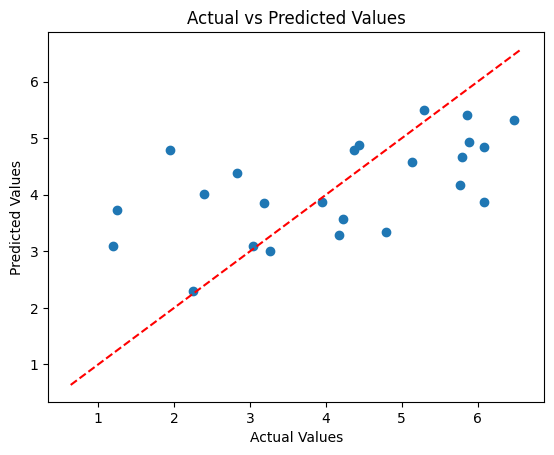

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Преобразование в DataFrame для удобства
X = filtered_corneal_with_descriptors.drop(['logPerm'], axis=1)
y = filtered_corneal_with_descriptors['logPerm']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Удаление строк с NaN или inf
X_train = X_train.replace([np.inf, -np.inf], np.nan).dropna()
y_train = y_train[X_train.index]  # Обновляем y_train, чтобы он соответствовал X_train

X_test = X_test.replace([np.inf, -np.inf], np.nan).dropna()
y_test = y_test[X_test.index]  # Обновляем y_test, чтобы он соответствовал X_test

# Создание и обучение модели случайного леса
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка производительности модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')

# Важность признаков
importance = model.feature_importances_
print(importance)

# Визуализация предсказаний
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Линия y=x
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

# Загрузка данных (предполагается, что corneal_with_descriptors уже загружен)
# corneal_with_descriptors = pd.read_csv('your_dataset.csv')  # Пример загрузки данных

# Определение признаков и целевой переменной
X = filtered_corneal_with_descriptors.drop('logPerm', axis=1)  # Замените 'logPerm' на имя вашей целевой переменной
y = filtered_corneal_with_descriptors['logPerm']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Использование LazyRegressor
reg = LazyRegressor()
models = reg.fit(X_train, X_test, y_train, y_test)

# Вывод результатов
results = models[0]  # Получаем DataFrame с результатами
print(results)

100%|██████████| 42/42 [00:08<00:00,  4.93it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2025
[LightGBM] [Info] Number of data points in the train set: 96, number of used features: 92
[LightGBM] [Info] Start training from score 4.144390
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import TransformedTargetRegressor
import numpy as np

# Загрузка данных (замените на свой набор данных)
# corneal_with_descriptors = pd.read_csv('your_dataset.csv')  # Пример загрузки данных

# Предположим, что у вас есть DataFrame corneal_with_descriptors
# Определение признаков и целевой переменной
X = filtered_corneal_with_descriptors.drop('logPerm', axis=1)  # Замените 'logPerm' на имя вашей целевой переменной
y = filtered_corneal_with_descriptors['logPerm']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание трансформатора для логарифмической трансформации
log_transformer = FunctionTransformer(np.log1p, validate=True)

# Создание модели с трансформацией целевой переменной
model = TransformedTargetRegressor(regressor=SGDRegressor(max_iter=1000, tol=1e-3, random_state=42),
                                    transformer=log_transformer)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 8.447750304259051e+29
R^2 Score: -3.355429895968203e+29


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Загрузка данных (замените на свой набор данных)
# corneal_with_descriptors = pd.read_csv('your_dataset.csv')  # Пример загрузки данных

# Предположим, что у вас есть DataFrame corneal_with_descriptors
# Определение признаков и целевой переменной
X = filtered_corneal_with_descriptors.drop('logPerm', axis=1)  # Замените 'logPerm' на имя вашей целевой переменной
y = filtered_corneal_with_descriptors['logPerm']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели SGDRegressor
model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 3.4876237529017365e+29
R^2 Score: -1.385277332413026e+29
